In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
data=pd.read_csv('netflix.csv')
data_orig=pd.read_csv('netflix.csv')

# Data Frames used:
# data -> stores Netflix dataset. Masking, Pre-processing and filter operations are performed on this dataframe. This is the primary data frame to be used
# data_orig -> stores original, unaltered dataset 
# df -> Function specific local variable dataset
# mov -> dataset to store the information for type: 'Movie' from the provided dataset for efficient statistical analysis of Movie catalogue
# tv -> dataset to store the information for type: 'TV Show' from the provided dataset for efficient statistical analysis of TV Show catalogue
# mov_df/tv_df -> Dataset to store aggregate/mathematical/operational output performed on 'mov' and 'tv' data frames respectively

In [93]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [156]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [94]:
data.shape

(8807, 12)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [96]:
data['type']=data['type'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      6173 non-null   object  
 4   cast          7982 non-null   object  
 5   country       7976 non-null   object  
 6   date_added    8797 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8803 non-null   object  
 9   duration      8804 non-null   object  
 10  listed_in     8807 non-null   object  
 11  description   8807 non-null   object  
dtypes: category(1), int64(1), object(10)
memory usage: 765.7+ KB


In [97]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [98]:
data.describe(include='object')

,show_id,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,1,19,19,2818,109,3207,1793,362,4


In [99]:
data.drop(columns=['description'],inplace=True)

In [100]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [101]:
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [102]:
data.fillna({'director':'Unknown','country':'Unknown','cast':'Unknown','date_added':'1899-01-01','rating':'Unknown','duration':'Unknown'},inplace=True)

In [103]:
data['director'].nunique()

4529

In [104]:
def un_nest_column(df, column):
    df[column] = df[column].str.split(', ')
    df = df.explode(column).reset_index(drop=True)
    return df

In [105]:
data=un_nest_column(data,'cast')
data=un_nest_column(data,'director')
data=un_nest_column(data,'country')
data=un_nest_column(data,'listed_in')

In [106]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows


In [107]:
data.drop_duplicates(keep='first',inplace=True)

In [108]:
data[data.duplicated(keep='first')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in


In [109]:
data[['director','listed_in','country','cast']].nunique()

director      4994
listed_in       42
country        128
cast         36440
dtype: int64

In [110]:
data['cast'].nunique()

36440

In [270]:
data['date_added']=pd.to_datetime(data['date_added'])
data['month_added']=data['date_added'].dt.month
data['year_added']=data['date_added'].dt.year
data['week_added']=data['date_added'].dt.isocalendar().week

In [271]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,9,2021,38
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,9,2021,38
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,9,2021,38
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,9,2021,38
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,9,2021,38


In [113]:
data.groupby('type')[['month_added','year_added','date_added']].aggregate(['min','max']).reset_index()

type month_added     year_added       date_added           
                   min max        min   max        min        max
0    Movie           1  12       2008  2021 2008-01-01 2021-09-25
1  TV Show           1  12       1899  2021 1899-01-01 2021-09-24

In [518]:
mov=data[data['type']=='Movie']
tv=data[data['type']=='TV Show']

In [115]:
mov.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,9,2021
159,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,9,2021
160,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,9,2021
161,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,9,2021
162,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Kimiko Glenn,Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,9,2021


In [116]:
tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,year_added
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,9,2021
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,9,2021
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,9,2021
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,9,2021
5,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,9,2021


# Movies and TV Show Analysis over the years and weeks of a year

In [306]:
mov_df=mov[['year_added','title']]
mov_df=mov_df.drop_duplicates().reset_index(drop=True).groupby(['year_added'])['title'].count().reset_index()
mov_df=mov_df[mov_df['year_added']>1899]

tv_df=tv[['year_added','title']]
tv_df=tv_df.drop_duplicates().reset_index(drop=True).groupby(['year_added'])['title'].count().reset_index()
tv_df=tv_df[tv_df['year_added']>1899]

In [255]:
mov_df

,year_added,title
0,2008,1
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,6
6,2014,19
7,2015,56
8,2016,253
9,2017,839


In [256]:
tv_df

,year_added,title
1,2008,1
2,2013,5
3,2014,5
4,2015,26
5,2016,176
6,2017,349
7,2018,412
8,2019,592
9,2020,595
10,2021,505


Text(0.5, 1.0, 'TV Shows & Movies added in Netflix over the years')

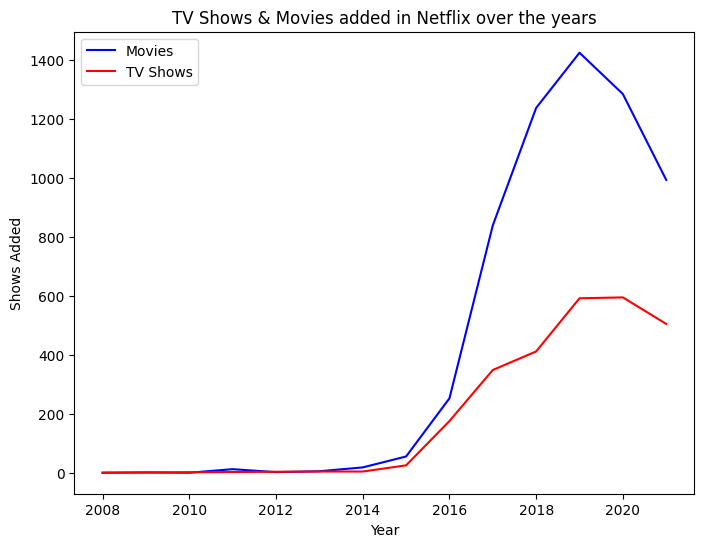

In [307]:
plt.figure(figsize=(8,6))
plt.plot(mov_df['year_added'],mov_df['title'],color='blue')
plt.plot(tv_df['year_added'],tv_df['title'],color='red')
plt.xlabel('Year')
plt.ylabel('Shows Added')
plt.legend(['Movies','TV Shows'])
plt.title('TV Shows & Movies added in Netflix over the years')

Text(0.5, 1.0, 'TV Shows & Movies added in Netflix over the years')

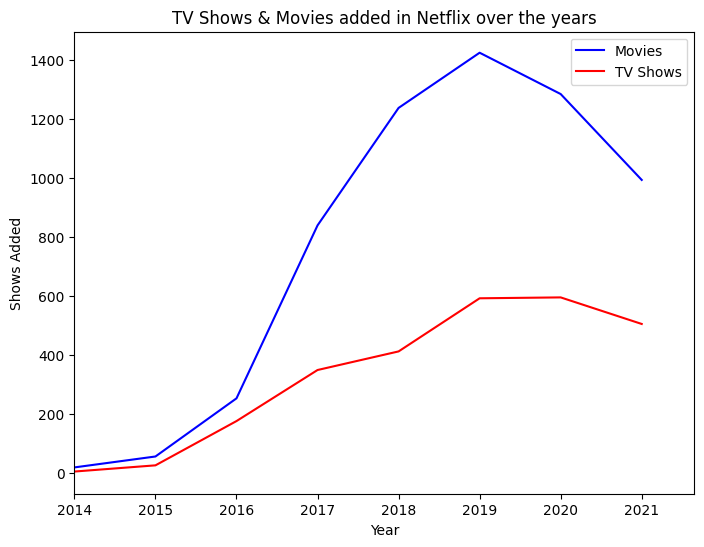

In [313]:
plt.figure(figsize=(8,6))
plt.plot(mov_df['year_added'],mov_df['title'],color='blue')
plt.plot(tv_df['year_added'],tv_df['title'],color='red')
plt.xlabel('Year')
plt.ylabel('Shows Added')
plt.legend(['Movies','TV Shows'])
plt.xlim(left=2014)
plt.title('TV Shows & Movies added in Netflix over the years')

# Country Level Analysis of Movies and TV Shows

In [363]:
mov_df=mov[['country','title']].drop_duplicates().reset_index(drop=True). \
groupby(['country'])[['title']].count().sort_values('title',ascending=False).reset_index()
mov_df=mov_df.drop(mov_df.loc[mov_df['country']=='Unknown'].index).rename(columns={'title':'count of movies'}).reset_index(drop=True)
mov_df['% total']=mov_df['count of movies']/mov_df['count of movies'].sum(axis=0)*100
mov_df['% total']=mov_df['% total'].round(2)
mov_df.loc[0:9,'Category']='Top 10 Countries'
mov_df.loc[10:,'Category']='Rest of the Countries'
mov_df['cat_total']=mov_df.groupby('Category')['% total'].transform('sum')
mov_df.head(15)

,country,count of movies,% total,Category
0,United States,2751,37.31,Top 10 Countries
1,India,962,13.05,Top 10 Countries
2,United Kingdom,532,7.21,Top 10 Countries
3,Canada,319,4.33,Top 10 Countries
4,France,303,4.11,Top 10 Countries
5,Germany,182,2.47,Top 10 Countries
6,Spain,171,2.32,Top 10 Countries
7,Japan,119,1.61,Top 10 Countries
8,China,114,1.55,Top 10 Countries
9,Mexico,111,1.51,Top 10 Countries


In [369]:
tv_df=tv[['country','title']].drop_duplicates().reset_index(drop=True). \
groupby(['country'])[['title']].count().sort_values('title',ascending=False).rename(columns={'title':'count of TV shows'}).reset_index()
tv_df=tv_df.drop(tv_df.loc[tv_df['country']=='Unknown'].index).reset_index(drop=True)
tv_df['% total']=tv_df['count of TV shows']/tv_df['count of TV shows'].sum(axis=0)*100
tv_df['% total']=tv_df['% total'].round(2)
tv_df.loc[0:9,'Category']='Top 10 Countries'
tv_df.loc[10:,'Category']='Rest of the Countries'
tv_df['cat_total']=tv_df.groupby('Category')['% total'].transform('sum')
tv_df.head(15)

,country,count of TV shows,% total,Category,cat_total
0,United States,938,35.53,Top 10 Countries,78.63
1,United Kingdom,272,10.30,Top 10 Countries,78.63
2,Japan,199,7.54,Top 10 Countries,78.63
3,South Korea,170,6.44,Top 10 Countries,78.63
4,Canada,126,4.77,Top 10 Countries,78.63
5,France,90,3.41,Top 10 Countries,78.63
6,India,84,3.18,Top 10 Countries,78.63
7,Taiwan,70,2.65,Top 10 Countries,78.63
8,Australia,66,2.50,Top 10 Countries,78.63
9,Spain,61,2.31,Top 10 Countries,78.63


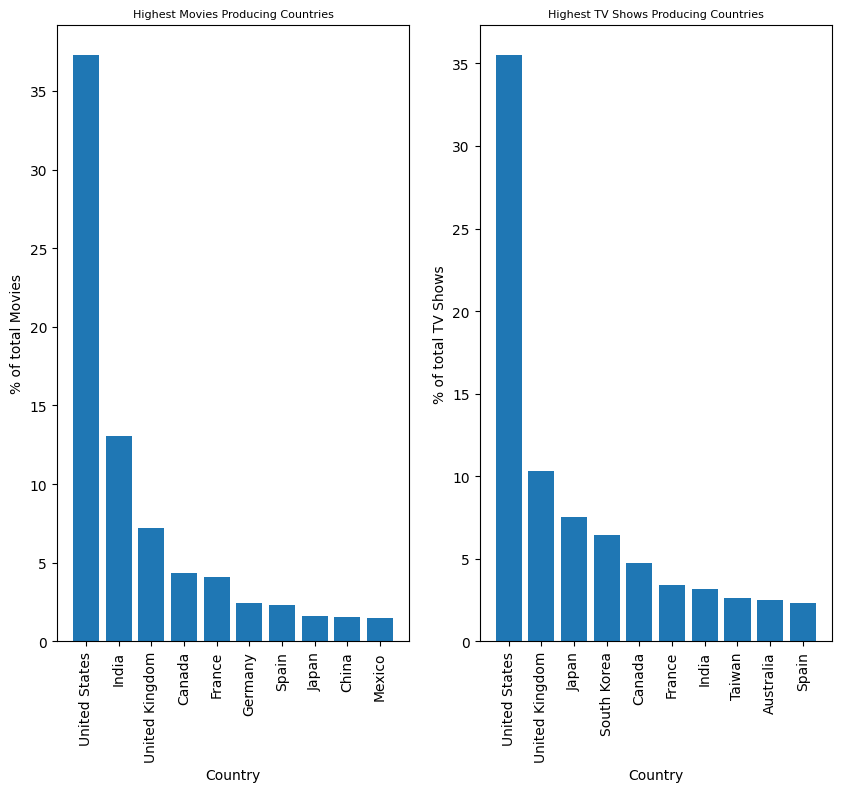

In [342]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.bar(mov_df['country'],mov_df['% total'])
plt.title('Highest Movies Producing Countries',size=8)
plt.xlabel('Country')
plt.ylabel('% of total Movies')
plt.xticks(rotation=90)
plt.subplot(122)
plt.bar(tv_df['country'],tv_df['% total'])
plt.title('Highest TV Shows Producing Countries', size=8)
plt.xlabel('Country')
plt.ylabel('% of total TV Shows')
plt.xticks(rotation=90)

plt.show()

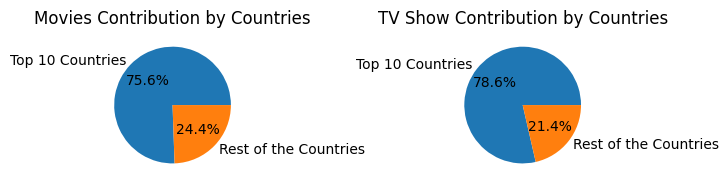

In [387]:
df=mov_df[['Category','cat_total']].drop_duplicates().reset_index(drop=True)
plt.subplot(1,3,1)
plt.pie(df['cat_total'],labels=df['Category'], autopct='%1.1f%%')
plt.title('Movies Contribution by Countries')

df=tv_df[['Category','cat_total']].drop_duplicates().reset_index(drop=True)
plt.subplot(1,3,3)
plt.pie(df['cat_total'],labels=df['Category'], autopct='%1.1f%%')
plt.title('TV Show Contribution by Countries')
plt.show()

In [324]:
mov_df=mov[['week_added','title']].drop_duplicates().reset_index(drop=True). \
groupby(['week_added'])[['title']].count().sort_values('title',ascending=False).reset_index().rename \
(columns={'title':'count of movies'})
mov_df['% total']=mov_df['count of movies']/mov_df['count of movies'].sum(axis=0)*100
mov_df['% total']=mov_df['% total'].round(2)
#mov_df=mov_df.head(10)
mov_df.head()

,week_added,count of movies,% total
0,1,316,5.15
1,44,243,3.96
2,40,215,3.51
3,9,207,3.38
4,26,195,3.18


In [339]:
tv_df=tv[['week_added','title']].drop_duplicates().reset_index(drop=True). \
groupby(['week_added'])[['title']].count().sort_values('title',ascending=False).reset_index().rename \
(columns={'title':'count of movies'})
tv_df['% total']=tv_df['count of movies']/tv_df['count of movies'].sum(axis=0)*100
tv_df['% total']=tv_df['% total'].round(2)
#tv_df=tv_df.head(10)
tv_df.head()

,week_added,count of movies,% total
0,27,86,3.21
1,31,83,3.10
2,13,76,2.84
3,44,75,2.80
4,24,75,2.80


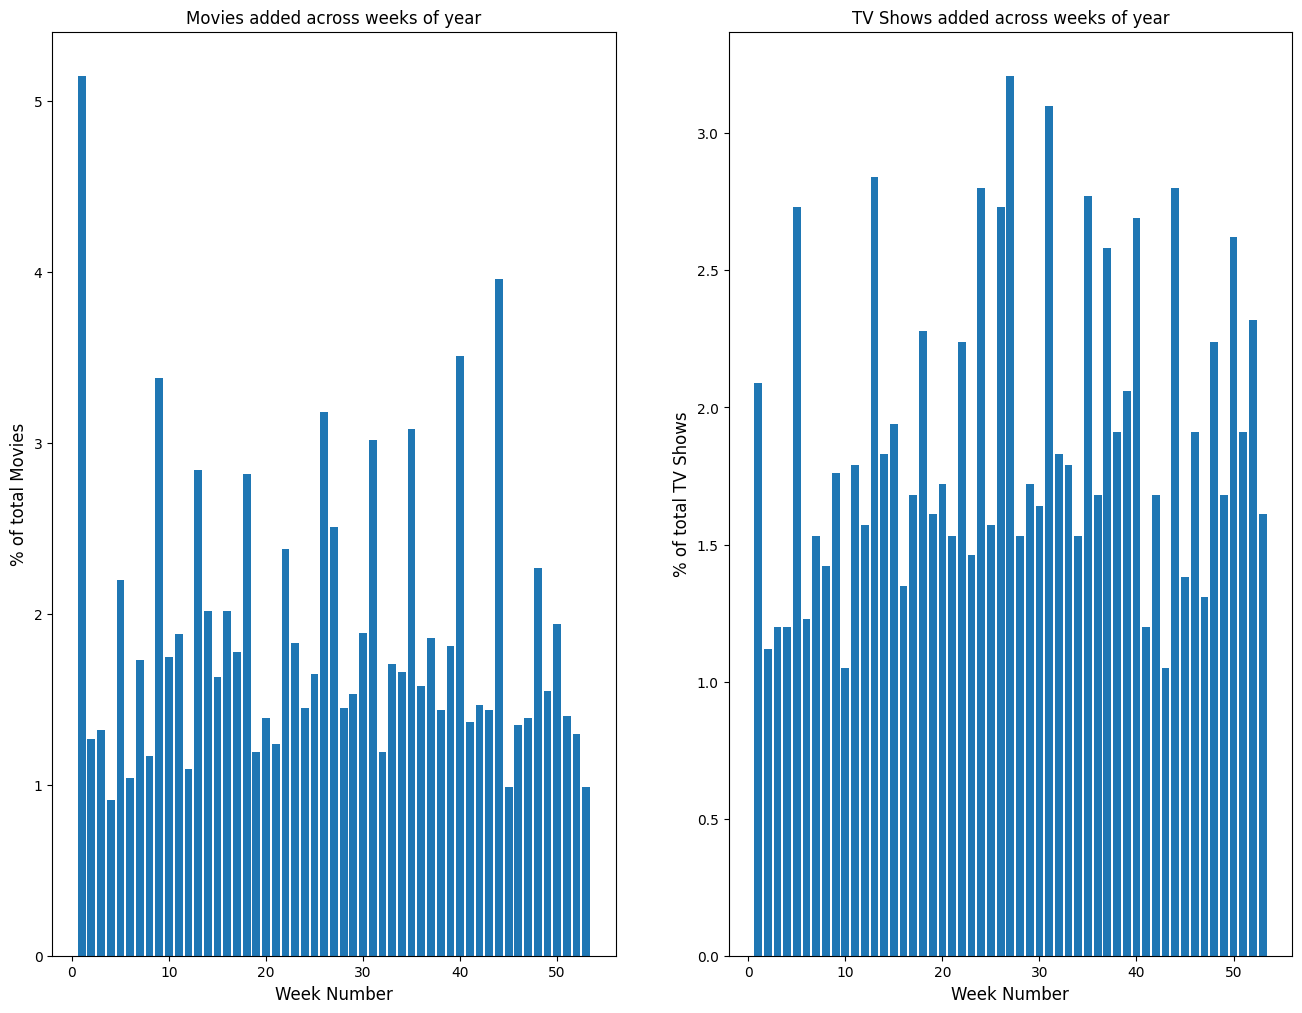

In [336]:
plt.figure(figsize=(16,12))
plt.subplot(1,2,1)
plt.bar(mov_df['week_added'],mov_df['% total'])
plt.title('Movies added across weeks of year',size=12)
plt.xlabel('Week Number',fontsize=12)
plt.ylabel('% of total Movies',fontsize=12)
plt.subplot(1,2,2)
plt.bar(tv_df['week_added'],tv_df['% total'])
plt.title('TV Shows added across weeks of year', size=12)
plt.xlabel('Week Number',fontsize=12)
plt.ylabel('% of total TV Shows',fontsize=12)
plt.show()

In [588]:
data.groupby('type')['release_year'].aggregate(['min','max']).reset_index()

,type,min,max
0,Movie,1942,2021
1,TV Show,1925,2021


# Analysis of actors/directors of different types of shows/movies.
# Filters for Top 10 Movies

In [940]:
top10_mov_gen=mov[['title','listed_in']].drop_duplicates().reset_index(drop=True)
top10_mov_gen.drop(top10_mov_gen[top10_mov_gen['listed_in']=='Unknown'].index,inplace=True)
top10_mov_gen=top10_mov_gen['listed_in'].value_counts().head(10).index
top10_mov_cast=mov[['title','cast']].drop_duplicates().reset_index(drop=True)
top10_mov_cast.drop(top10_mov_cast[top10_mov_cast['cast']=='Unknown'].index,inplace=True)
top10_mov_cast=top10_mov_cast['cast'].value_counts().head(10).index
top10_mov_director=mov[['title','director']].drop_duplicates().reset_index(drop=True)
top10_mov_director.drop(top10_mov_director[top10_mov_director['director']=='Unknown'].index,inplace=True)
top10_mov_director=top10_mov_director['director'].value_counts().head(10).index
top10_mov_country=mov[['title','country']].drop_duplicates().reset_index(drop=True)
top10_mov_country.drop(top10_mov_country[top10_mov_country['country']=='Unknown'].index,inplace=True)
top10_mov_country=top10_mov_country['country'].value_counts().head(10).index

# ==============================================

# Director Analysis

In [826]:
mov_df=mov[['title','director']].drop_duplicates().reset_index(drop=True)

In [828]:
mov_df=mov_df.groupby('director')['title'].count().reset_index().rename(columns={'title':'movie count'}).sort_values('movie count',ascending=False)

In [831]:
mov_df['% total']=mov_df['movie count']/mov_df['movie count'].sum(axis=0)*100
mov_df['% total']=mov_df['% total'].round(2)
mov_df

,director,movie count,% total
4539,Unknown,188,2.74
3582,Rajiv Chilaka,22,0.32
1817,Jan Suter,21,0.31
3633,Raúl Campos,19,0.28
4261,Suhas Kadav,16,0.23
...,...,...,...
2191,José Ortuño,1,0.01
597,Bob Persichetti,1,0.01
2193,Jovanka Vuckovic,1,0.01
596,Bob Odenkirk,1,0.01


In [833]:
tv_df=tv[['title','director']].drop_duplicates().reset_index(drop=True)
tv_df=tv_df.groupby('director')['title'].count().reset_index().rename(columns={'title':'tv count'}).sort_values('tv count',ascending=False)
tv_df['% total']=tv_df['tv count']/tv_df['tv count'].sum(axis=0)*100
tv_df['% total']=tv_df['% total'].round(2)
tv_df

,director,tv count,% total
284,Unknown,2446,88.69
146,Ken Burns,3,0.11
8,Alastair Fothergill,3,0.11
259,Stan Lathan,2,0.07
128,Joe Berlinger,2,0.07
...,...,...,...
99,Houda Benyamina,1,0.04
98,Hong Won-ki,1,0.04
97,Hiroyuki Seshita,1,0.04
96,Hikaru Toda,1,0.04


In [910]:
mov_df=mov.loc[mov['director'].isin(top10_mov_director),['director','title']]
mov_df=mov_df.drop_duplicates().reset_index(drop=True)

In [675]:
mov_df['director'].value_counts()

Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Jay Karas              15
Marcus Raboy           15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Jay Chapman            12
Name: director, dtype: int64

In [912]:
mov_df=mov.loc[(mov['director'].isin(top10_mov_director)) & (mov['country']!='Unknown'),['director','country','title']]
mov_df=mov_df.drop_duplicates().reset_index(drop=True)

In [677]:
mov_df['country'].value_counts()

United States     53
Mexico            22
Philippines       13
Egypt             12
Argentina         10
India              6
France             5
Chile              4
Colombia           4
United Kingdom     2
Algeria            1
Japan              1
Italy              1
Hong Kong          1
Name: country, dtype: int64

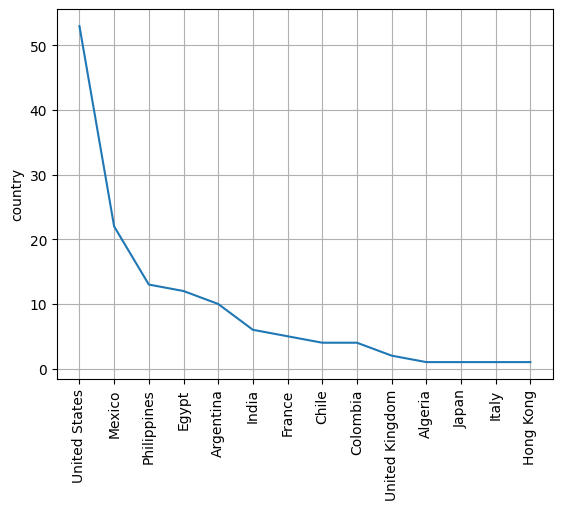

In [678]:
sns.lineplot(data=mov_df['country'].value_counts(), x=mov_df['country'].value_counts().index,y=mov_df['country'].value_counts())
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [584]:
mov_df=mov.loc[(mov['director'].isin(top10_mov_director)) & (mov['release_year']>1899),['director','release_year','listed_in']]
mov_df=mov_df.drop_duplicates().reset_index(drop=True)

# =====================================================
# Filter for TV shows

In [939]:
top10_tv_gen=tv[['title','listed_in']].drop_duplicates().reset_index(drop=True)
top10_tv_gen.drop(top10_tv_gen[top10_tv_gen['listed_in']=='Unknown'].index,inplace=True)
top10_tv_gen=top10_tv_gen['listed_in'].value_counts().head(10).index
top10_tv_cast=tv[['title','cast']].drop_duplicates().reset_index(drop=True)
top10_tv_cast.drop(top10_tv_cast[top10_tv_cast['cast']=='Unknown'].index,inplace=True)
top10_tv_cast=top10_tv_cast['cast'].value_counts().head(10).index
top10_tv_director=tv[['title','director']].drop_duplicates().reset_index(drop=True)
top10_tv_director.drop(top10_tv_director[top10_tv_director['director']=='Unknown'].index,inplace=True)
top10_tv_director=top10_tv_director['director'].value_counts().head(10).index
top10_tv_country=tv[['title','country']].drop_duplicates().reset_index(drop=True)
top10_tv_country.drop(top10_tv_country[top10_tv_country['country']=='Unknown'].index,inplace=True)
top10_tv_country=top10_tv_country['country'].value_counts().head(10).index

# ==========================================================

# Director Analysis

In [809]:
tv_df=tv.loc[tv['director'].isin(top10_tv_director),['director','title']]
tv_df=tv_df.drop_duplicates().reset_index(drop=True)

In [682]:
tv_df['director'].value_counts()

Alastair Fothergill      3
Ken Burns                3
Gautham Vasudev Menon    2
Hsu Fu-chun              2
Joe Berlinger            2
Jung-ah Im               2
Lynn Novick              2
Shin Won-ho              2
Stan Lathan              2
Iginio Straffi           2
Name: director, dtype: int64

In [582]:
tv_df=tv.loc[(tv['director'].isin(top10_tv_director)) & (tv['release_year']>1899),['director','release_year','listed_in']]
tv_df=tv_df.drop_duplicates().reset_index(drop=True)

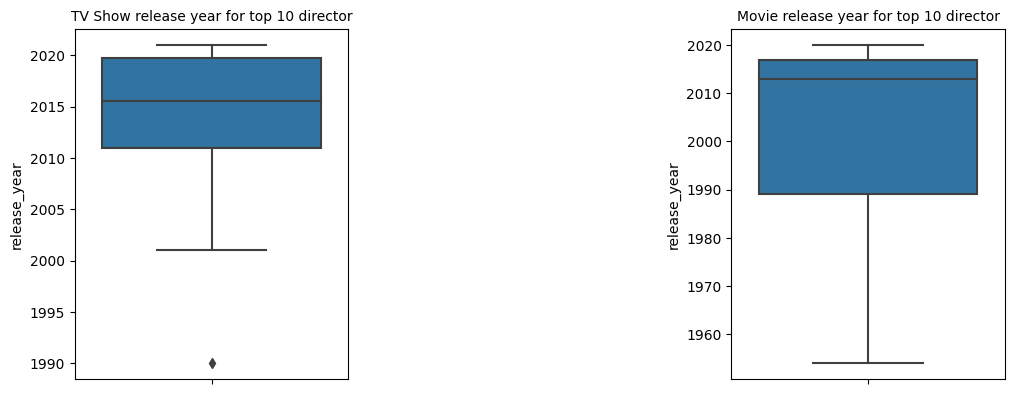

In [586]:
plt.figure(figsize=(12,10))
plt.subplot(2,3,1)
plt.title('TV Show release year for top 10 director', fontsize=10)
sns.boxplot(data=tv_df,y='release_year')


plt.subplot(2,3,3)
plt.title('Movie release year for top 10 director', fontsize=10)
sns.boxplot(data=mov_df,y='release_year')
plt.show()

<Axes: title={'center': 'Top 10 TV Show Directors'}, xlabel='director', ylabel='count'>

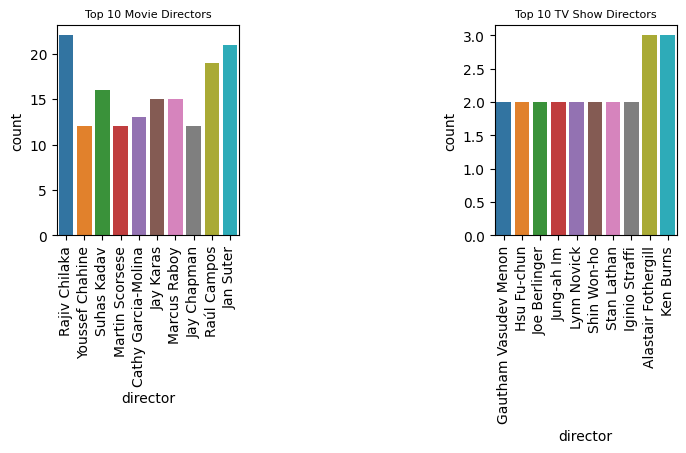

In [526]:
plt.figure(figsize=(8,6))
plt.subplot(2,3,1)
plt.xticks(rotation=90)
plt.title('Top 10 Movie Directors', fontsize=8)
sns.countplot(data=mov_df,x='director')

plt.subplot(2,3,3)
plt.xticks(rotation=90)
plt.title('Top 10 TV Show Directors', fontsize=8)
sns.countplot(data=tv_df,x='director')


In [909]:
tv_df=tv.loc[(tv['director'].isin(top10_tv_director)) & (tv['country']!='Unknown'),['director','country','title']]
tv_df=tv_df.drop_duplicates().reset_index(drop=True)

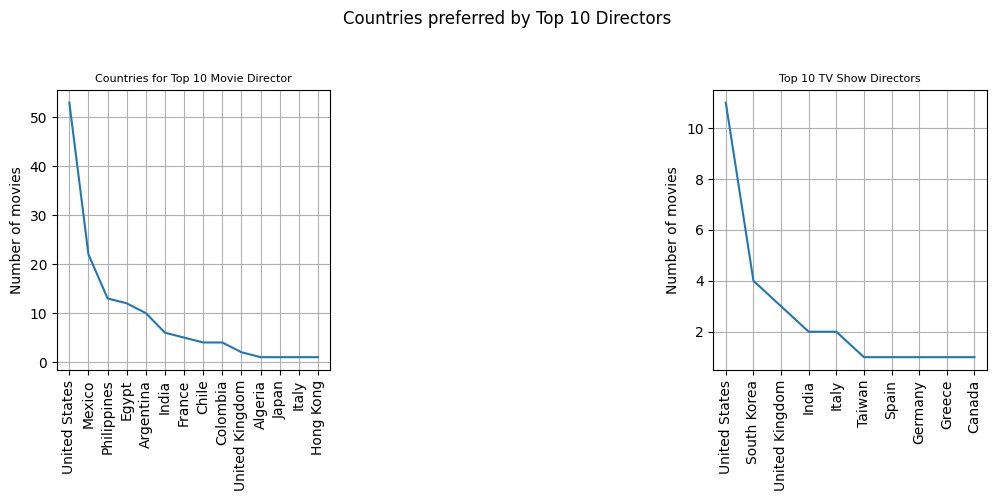

In [915]:
plt.figure(figsize=(12,8))
plt.suptitle('Countries preferred by Top 10 Directors')
plt.subplot(2,3,1)
plt.xticks(rotation=90)
plt.title('Countries for Top 10 Movie Director', fontsize=8)
plt.grid()
plt.ylabel('Number of movies')
sns.lineplot(data=mov_df['country'].value_counts(), x=mov_df['country'].value_counts().index,y=mov_df['country'].value_counts())

plt.subplot(2,3,3)
plt.xticks(rotation=90)
plt.title('Top 10 TV Show Directors', fontsize=8)
plt.grid()
plt.ylabel('Number of movies')
sns.lineplot(data=tv_df['country'].value_counts(), x=tv_df['country'].value_counts().index,y=tv_df['country'].value_counts())
plt.show()

# Genre Analysis

In [941]:
mov_df=mov[['listed_in','title']]
mov_df=mov_df.drop_duplicates().reset_index(drop=True)
mov_df

,listed_in,title
0,Documentaries,Dick Johnson Is Dead
1,Children & Family Movies,My Little Pony: A New Generation
2,Dramas,Sankofa
3,Independent Movies,Sankofa
4,International Movies,Sankofa
...,...,...
13185,Children & Family Movies,Zoom
13186,Comedies,Zoom
13187,Dramas,Zubaan
13188,International Movies,Zubaan


In [942]:
mov_df['listed_in'].nunique()

20

In [943]:
mov_df.groupby('listed_in')['title'].count().sort_values(ascending=False)

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Cult Movies                   71
Anime Features                71
Faith & Spirituality          65
Movies                        57
Name: title, dtype: int64

In [944]:
mov_df=mov_df.groupby('listed_in')['title'].count().sort_values(ascending=False).reset_index()
mov_df.rename(columns={'title':'count of movies'},inplace=True)
mov_df['%total']=mov_df['count of movies']/mov_df['count of movies'].sum(axis=0)*100
mov_df['%total']=mov_df['%total'].round(2)
mov_df

,listed_in,count of movies,%total
0,International Movies,2752,20.86
1,Dramas,2427,18.40
2,Comedies,1674,12.69
3,Documentaries,869,6.59
4,Action & Adventure,859,6.51
5,Independent Movies,756,5.73
6,Children & Family Movies,641,4.86
7,Romantic Movies,616,4.67
8,Thrillers,577,4.37
9,Music & Musicals,375,2.84


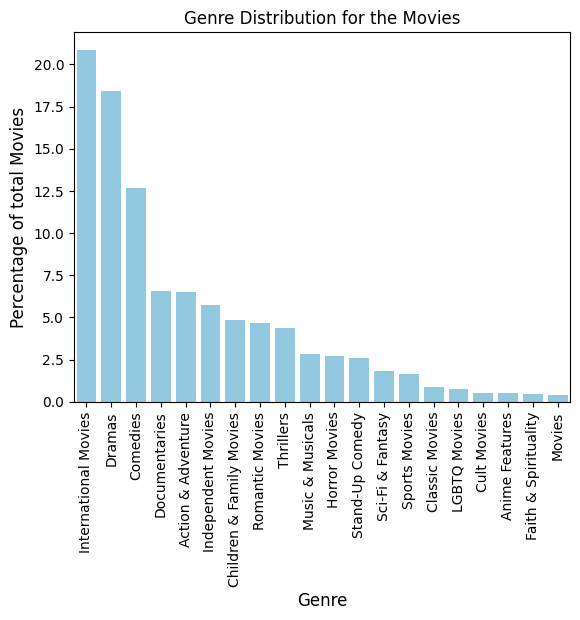

In [945]:
plt.xticks(rotation=90)
sns.barplot(data=mov_df, x='listed_in',y='%total',color='skyblue')
plt.title('Genre Distribution for the Movies')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Percentage of total Movies',fontsize=12)
plt.show()

In [946]:
tv_df=tv[['listed_in','title']]
tv_df=tv_df.drop_duplicates().reset_index(drop=True)
tv_df

,listed_in,title
0,International TV Shows,Blood & Water
1,TV Dramas,Blood & Water
2,TV Mysteries,Blood & Water
3,Crime TV Shows,Ganglands
4,International TV Shows,Ganglands
...,...,...
6128,Romantic TV Shows,Zindagi Gulzar Hai
6129,TV Dramas,Zindagi Gulzar Hai
6130,Kids' TV,Zombie Dumb
6131,Korean TV Shows,Zombie Dumb


In [947]:
tv_df=tv_df.groupby('listed_in')['title'].count().sort_values(ascending=False).reset_index()
tv_df.rename(columns={'title':'count of tv'},inplace=True)
tv_df['%total']=tv_df['count of tv']/tv_df['count of tv'].sum(axis=0)*100
tv_df['%total']=tv_df['%total'].round(2)
tv_df

,listed_in,count of tv,%total
0,International TV Shows,1351,22.03
1,TV Dramas,763,12.44
2,TV Comedies,581,9.47
3,Crime TV Shows,470,7.66
4,Kids' TV,451,7.35
5,Docuseries,395,6.44
6,Romantic TV Shows,370,6.03
7,Reality TV,255,4.16
8,British TV Shows,253,4.13
9,Anime Series,176,2.87


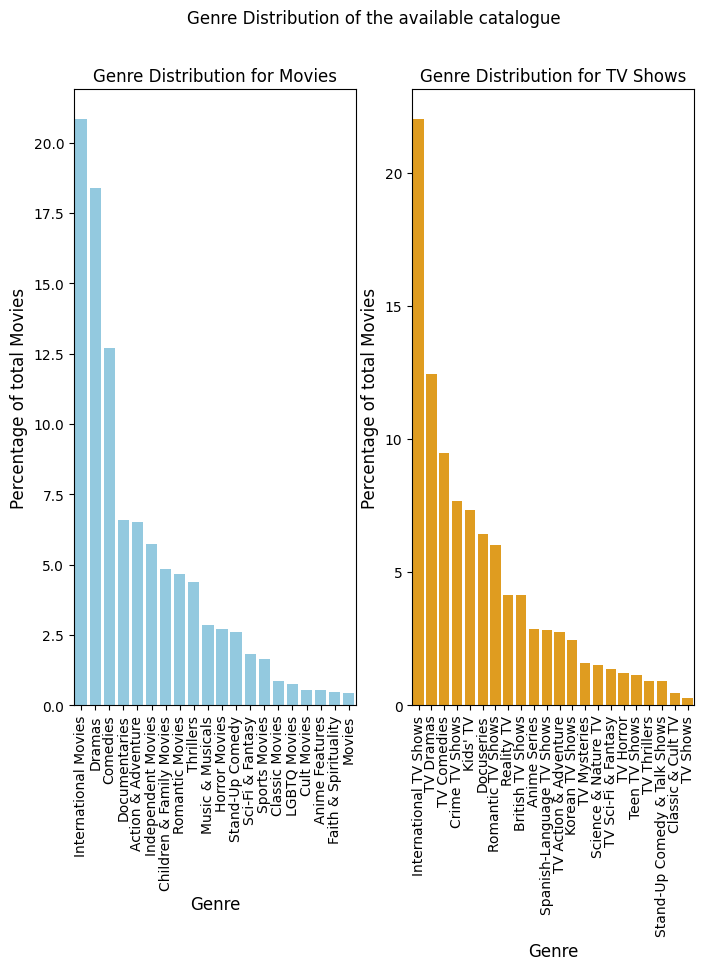

In [948]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.barplot(data=mov_df, x='listed_in',y='%total',color='skyblue')
plt.title('Genre Distribution for Movies')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Percentage of total Movies',fontsize=12)


plt.subplot(1,2,2)
plt.xticks(rotation=90)
sns.barplot(data=tv_df, x='listed_in',y='%total',color='orange')
plt.title('Genre Distribution for TV Shows')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Percentage of total Movies',fontsize=12)
plt.suptitle('Genre Distribution of the available catalogue')
plt.show()

In [971]:
mov_df=mov.loc[(mov['listed_in'].isin(top10_mov_gen)) & (mov['year_added']!=1899),['title','listed_in','year_added']]
mov_df=mov_df.drop_duplicates().reset_index(drop=True)

In [972]:
mov_df

,title,listed_in,year_added
0,Dick Johnson Is Dead,Documentaries,2021
1,My Little Pony: A New Generation,Children & Family Movies,2021
2,Sankofa,Dramas,2021
3,Sankofa,Independent Movies,2021
4,Sankofa,International Movies,2021
...,...,...,...
11541,Zoom,Children & Family Movies,2020
11542,Zoom,Comedies,2020
11543,Zubaan,Dramas,2019
11544,Zubaan,International Movies,2019


In [974]:
df=mov_df.groupby(['listed_in','year_added'])['title'].count().reset_index()
df=df.reset_index(drop=True)
df

,listed_in,year_added,title
0,Action & Adventure,2014,1
1,Action & Adventure,2015,2
2,Action & Adventure,2016,18
3,Action & Adventure,2017,97
4,Action & Adventure,2018,173
...,...,...,...
86,Thrillers,2017,68
87,Thrillers,2018,111
88,Thrillers,2019,135
89,Thrillers,2020,133


In [969]:
df=mov_df.loc[:,:]

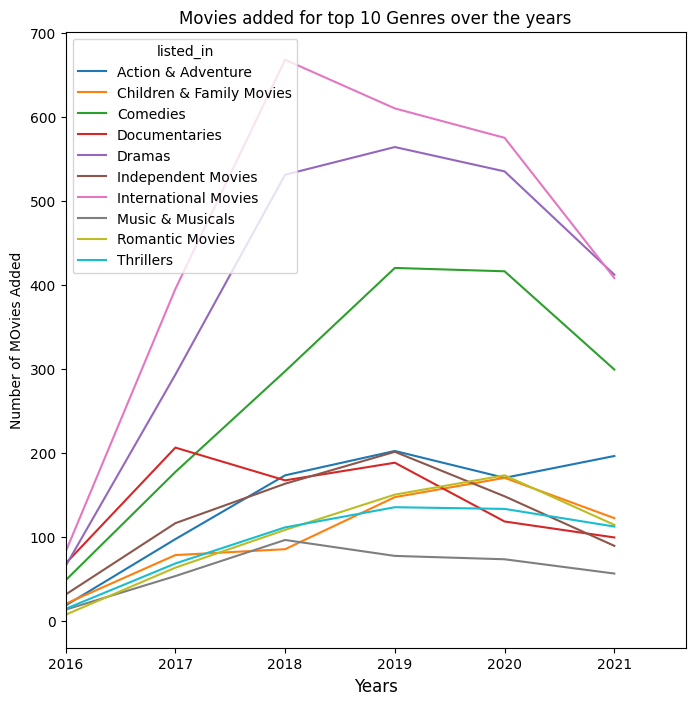

In [977]:
plt.figure(figsize=(8,8))
sns.lineplot(data=df,x='year_added',y='title',hue='listed_in')
plt.xlim(left=2016)
plt.title('Movies added for top 10 Genres over the years')
plt.xlabel('Years', fontsize=12)
plt.ylabel('Number of MOvies Added')
plt.show()

In [988]:
tv_df=tv.loc[(tv['listed_in'].isin(top10_tv_gen)) & (tv['year_added']!=1899),['listed_in','year_added','title']]
tv_df=tv_df.drop_duplicates().reset_index(drop=True)

In [989]:
tv_df

,listed_in,year_added,title
0,International TV Shows,2021,Blood & Water
1,TV Dramas,2021,Blood & Water
2,Crime TV Shows,2021,Ganglands
3,International TV Shows,2021,Ganglands
4,Docuseries,2021,Jailbirds New Orleans
...,...,...,...
5045,International TV Shows,2016,Zindagi Gulzar Hai
5046,Romantic TV Shows,2016,Zindagi Gulzar Hai
5047,TV Dramas,2016,Zindagi Gulzar Hai
5048,Kids' TV,2019,Zombie Dumb


In [990]:
df=tv_df.groupby(['listed_in','year_added'])['title'].count().reset_index()
df=df.reset_index(drop=True)
df

,listed_in,year_added,title
0,Anime Series,2016,14
1,Anime Series,2017,11
2,Anime Series,2018,22
3,Anime Series,2019,42
4,Anime Series,2020,46
...,...,...,...
71,TV Dramas,2017,130
72,TV Dramas,2018,109
73,TV Dramas,2019,164
74,TV Dramas,2020,164


In [991]:
tv_df=df.loc[:,:]
tv_df

,listed_in,year_added,title
0,Anime Series,2016,14
1,Anime Series,2017,11
2,Anime Series,2018,22
3,Anime Series,2019,42
4,Anime Series,2020,46
...,...,...,...
71,TV Dramas,2017,130
72,TV Dramas,2018,109
73,TV Dramas,2019,164
74,TV Dramas,2020,164


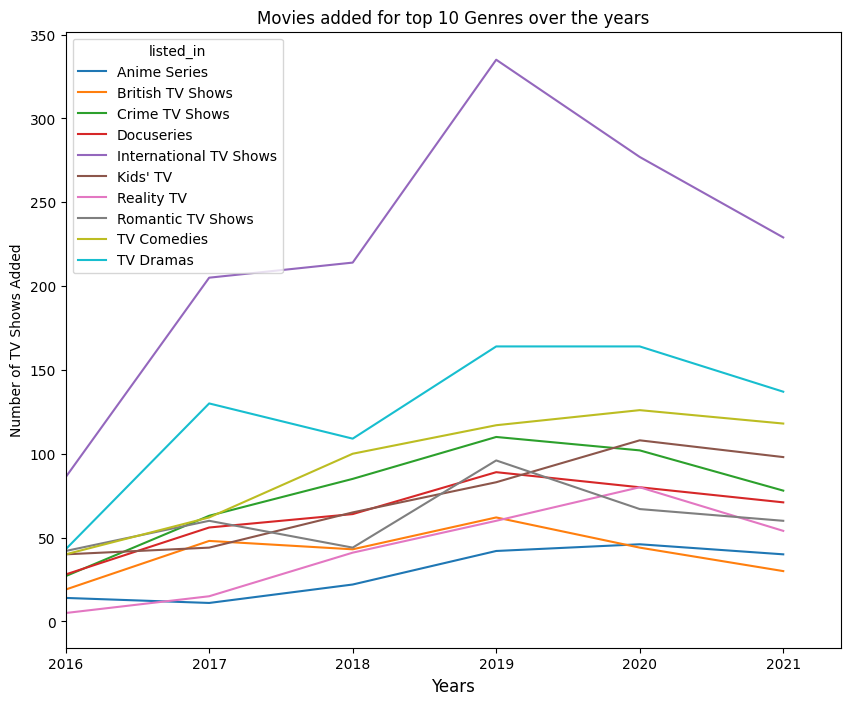

In [996]:
plt.figure(figsize=(10,8))
sns.lineplot(data=tv_df,x='year_added',y='title',hue='listed_in')
plt.xlim(left=2016)
plt.title('Movies added for top 10 Genres over the years')
plt.xlabel('Years', fontsize=12)
plt.ylabel('Number of TV Shows Added')
plt.show()

# Date Added Analysis - Diff bw movie release & date added for new movies & shows

In [854]:
df=data.loc[data['date_added'].dt.year!=1899,['type','title','date_added','release_year','year_added','week_added']].drop_duplicates().reset_index(drop=True)

In [855]:
df.shape

(8797, 6)

In [847]:
data.loc[data['date_added'].dt.year==1899].count()

show_id         158
type            158
title           158
director        158
cast            158
country         158
date_added      158
release_year    158
rating          158
duration        158
listed_in       158
month_added     158
year_added      158
week_added      158
dtype: int64

In [851]:
df['date_added'].dt.year.min()

2008

In [858]:
df=df[df['release_year']>=df['date_added'].dt.year.min()]

In [859]:
df.shape

(7752, 6)

In [853]:
df.head()

,type,title,date_added,release_year,year_added,week_added
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,2021,38
1,TV Show,Blood & Water,2021-09-24,2021,2021,38
2,TV Show,Ganglands,2021-09-24,2021,2021,38
3,TV Show,Jailbirds New Orleans,2021-09-24,2021,2021,38
4,TV Show,Kota Factory,2021-09-24,2021,2021,38


In [860]:
df['diff']=df['year_added']-df['release_year']

In [865]:
df.head()

,type,title,date_added,release_year,year_added,week_added,diff
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,2021,38,1
1,TV Show,Blood & Water,2021-09-24,2021,2021,38,0
2,TV Show,Ganglands,2021-09-24,2021,2021,38,0
3,TV Show,Jailbirds New Orleans,2021-09-24,2021,2021,38,0
4,TV Show,Kota Factory,2021-09-24,2021,2021,38,0


In [864]:
df[df['diff']<0]

,type,title,date_added,release_year,year_added,week_added,diff
1551,TV Show,Hilda,2020-12-14,2021,2020,51,-1
1696,TV Show,Polly Pocket,2020-11-15,2021,2020,46,-1
2920,TV Show,Love Is Blind,2020-02-13,2021,2020,7,-1
3168,TV Show,Fuller House,2019-12-06,2020,2019,49,-1
3287,TV Show,Maradona in Mexico,2019-11-13,2020,2019,46,-1
3369,TV Show,BoJack Horseman,2019-10-25,2020,2019,43,-1
3433,TV Show,The Hook Up Plan,2019-10-11,2020,2019,41,-1
4844,TV Show,Unbreakable Kimmy Schmidt,2018-05-30,2019,2018,22,-1
4845,TV Show,Arrested Development,2018-05-29,2019,2018,22,-1
5394,Movie,Hans Teeuwen: Real Rancour,2017-07-01,2018,2017,26,-1


In [875]:
df=df.groupby(['type','diff'])[['diff']].aggregate(count_of_diff=('diff','count')).reset_index()

In [876]:
df1=df.loc[:,:]

In [877]:
df1

,type,diff,count_of_diff
0,Movie,-3,0
1,Movie,-2,0
2,Movie,-1,2
3,Movie,0,1862
4,Movie,1,1178
5,Movie,2,489
6,Movie,3,347
7,Movie,4,273
8,Movie,5,191
9,Movie,6,181


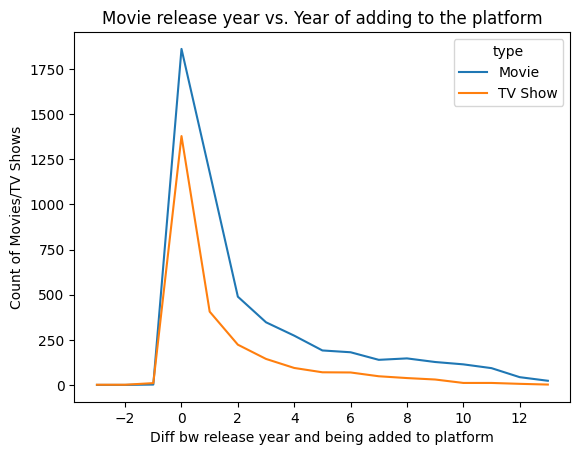

In [880]:
plt.xlabel('Diff bw release year and being added to platform')
plt.ylabel('Count of Movies/TV Shows')
plt.title('Movie release year vs. Year of adding to the platform')
sns.lineplot(data=df1,x='diff',y='count_of_diff',hue='type')
plt.show()

In [881]:
df=df.loc[df['diff']>=0]

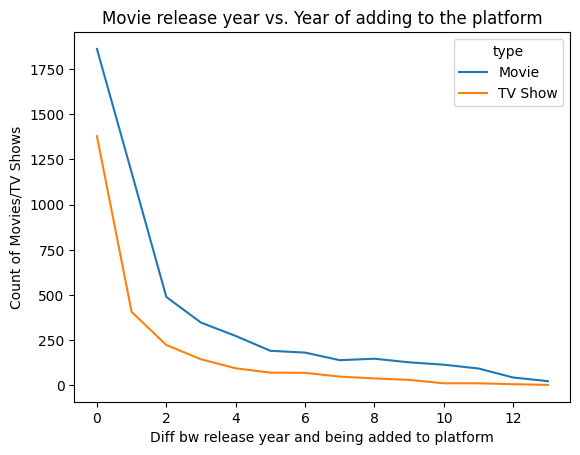

In [898]:
plt.xlabel('Diff bw release year and being added to platform')
plt.ylabel('Count of Movies/TV Shows')
plt.title('Movie release year vs. Year of adding to the platform')
sns.lineplot(data=df,x='diff',y='count_of_diff',hue='type')
plt.show()

In [907]:
df['total']=df.groupby('type')['count_of_diff'].transform('sum')

C:\Users\abhisheksingh28\AppData\Local\Temp\ipykernel_20524\763027647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total']=df.groupby('type')['count_of_diff'].transform('sum')


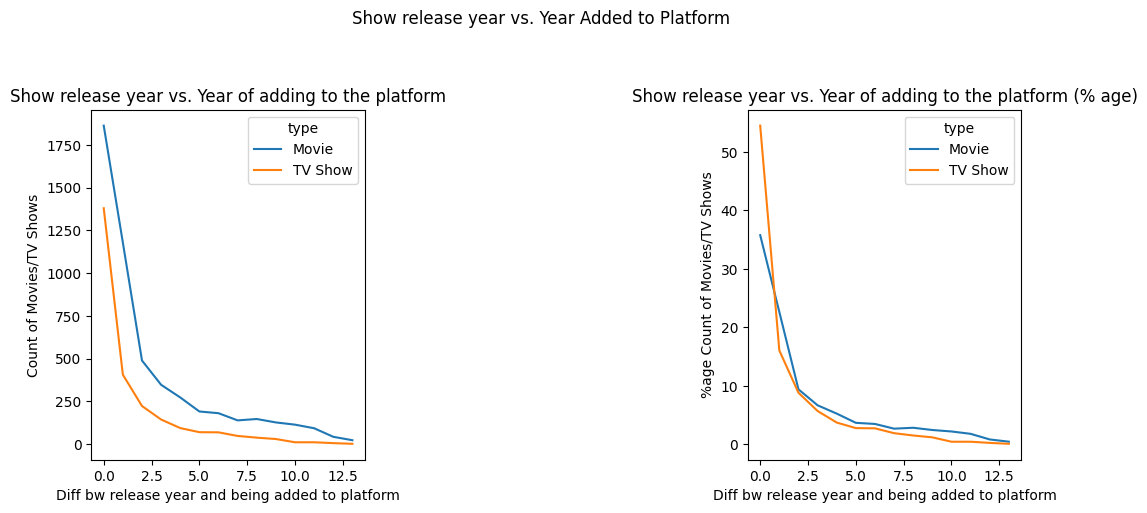

In [904]:
plt.figure(figsize=(12,10))
plt.subplot(2,3,1)
plt.xlabel('Diff bw release year and being added to platform')
plt.ylabel('Count of Movies/TV Shows')
plt.title('Show release year vs. Year of adding to the platform')
sns.lineplot(data=df,x='diff',y='count_of_diff',hue='type')

plt.subplot(2,3,3)
plt.xlabel('Diff bw release year and being added to platform')
plt.ylabel('%age Count of Movies/TV Shows')
plt.title('Show release year vs. Year of adding to the platform (% age)')
sns.lineplot(data=df,x='diff',y='%total',hue='type')
plt.suptitle('Show release year vs. Year Added to Platform')
plt.show()